## 6.4.1 過学習

epoch:0, train acc:0.12, test acc:0.112
epoch:1, train acc:0.12333333333333334, test acc:0.1131
epoch:2, train acc:0.13, test acc:0.1131
epoch:3, train acc:0.13, test acc:0.1175
epoch:4, train acc:0.14333333333333334, test acc:0.1228
epoch:5, train acc:0.14333333333333334, test acc:0.1228
epoch:6, train acc:0.16333333333333333, test acc:0.1281
epoch:7, train acc:0.16333333333333333, test acc:0.1334
epoch:8, train acc:0.17, test acc:0.1381
epoch:9, train acc:0.17666666666666667, test acc:0.1372
epoch:10, train acc:0.2, test acc:0.1436
epoch:11, train acc:0.20333333333333334, test acc:0.1459
epoch:12, train acc:0.23666666666666666, test acc:0.1588
epoch:13, train acc:0.25, test acc:0.1649
epoch:14, train acc:0.26, test acc:0.1721
epoch:15, train acc:0.2633333333333333, test acc:0.1715
epoch:16, train acc:0.26666666666666666, test acc:0.1725
epoch:17, train acc:0.28, test acc:0.1768
epoch:18, train acc:0.28, test acc:0.1774
epoch:19, train acc:0.31333333333333335, test acc:0.1917
epoch:20

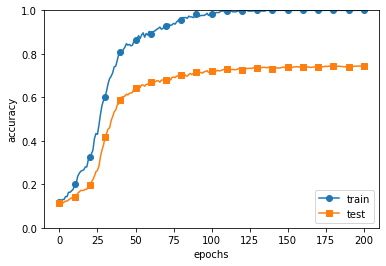

In [4]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
weight_decay_lambda = 0 # weight decayを使用しない場合
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 6.4.3 Dropout

In [5]:
class Dropout:
    def __int__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def  forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - sself.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

train loss:2.3122227697986077
=== epoch:1, train acc:0.11, test acc:0.108 ===
train loss:2.3157425052894776
train loss:2.299307102837142
train loss:2.292060116707774
=== epoch:2, train acc:0.11666666666666667, test acc:0.1078 ===
train loss:2.311044553669637
train loss:2.307682671162792
train loss:2.306248114112768
=== epoch:3, train acc:0.11666666666666667, test acc:0.1089 ===
train loss:2.3117608056607906
train loss:2.3117224824346976
train loss:2.3058737530533295
=== epoch:4, train acc:0.11666666666666667, test acc:0.1097 ===
train loss:2.3146319919895593
train loss:2.293696467540228
train loss:2.3079238587339423
=== epoch:5, train acc:0.11666666666666667, test acc:0.1105 ===
train loss:2.299995744123357
train loss:2.298746061939697
train loss:2.3060660375667026
=== epoch:6, train acc:0.12333333333333334, test acc:0.1104 ===
train loss:2.308332665695044
train loss:2.313741263347175
train loss:2.309617141299629
=== epoch:7, train acc:0.13, test acc:0.1097 ===
train loss:2.29821271663

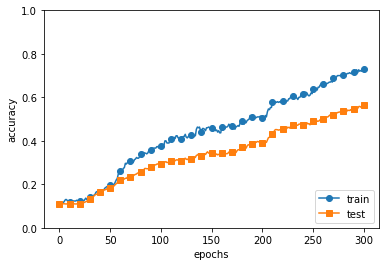

In [6]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [8]:
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()
x_train, t_train = shuffle_dataset(x_train, t_train)
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]